## Introduction

In [5]:
import numpy as np
import ast
with open('clock_image.txt', 'r') as f:
    clock = ast.literal_eval(f.read()) # <--原先為文字，現在變成是list --> numpy 
print(type(clock))    
np.array(clock).shape

<class 'list'>


(300, 400)

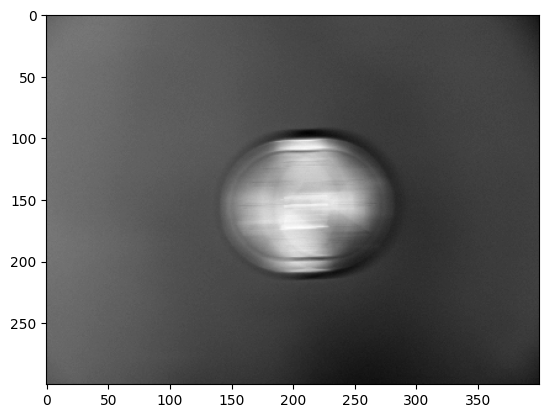

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ast
def show_image(image, title = 'Image', cmap_type = 'gray', interpolation = None):
    plt.imshow(image, cmap = cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()

with open('clock_image.txt', 'r') as f:
    clock_image = ast.literal_eval(f.read())        
clock_image = np.array(clock_image)
plt.imshow(clock_image, cmap = 'gray')
plt.show()

In [7]:
np.max(clock_image) - np.min(clock_image)

148

In [ ]:
Possible Answers
( ) The contrast is 255 (high contrast).
(*) The contrast is 148.
( ) The contrast is 189.
( ) The contrast is 49 (low contrast).

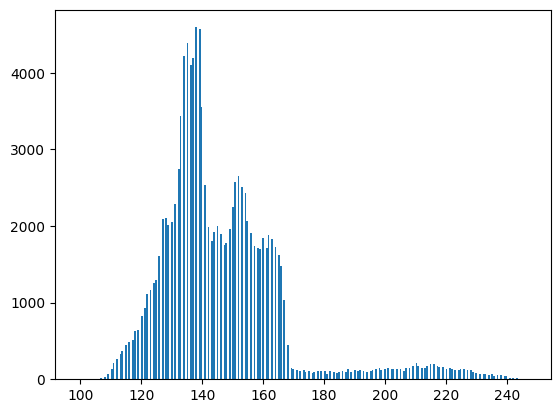

In [9]:
# 繪製histogram
clock_image.shape

import matplotlib.pyplot as plt
plt.hist(clock_image.flatten(), bins = 256)
plt.show()

In [10]:
# Practice
import matplotlib.pyplot as plt
def show_image(image, title = 'Image', cmap_type = 'gray', interpolation = None):
    plt.imshow(image, cmap = cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (32, 8), sharex = True, sharey = True)
    ax1.imshow(original, cmap = plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap = plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

chest_xray_image = plt.imread('chest_xray_image.png')
chest_xray_image.shape

(1024, 1024)

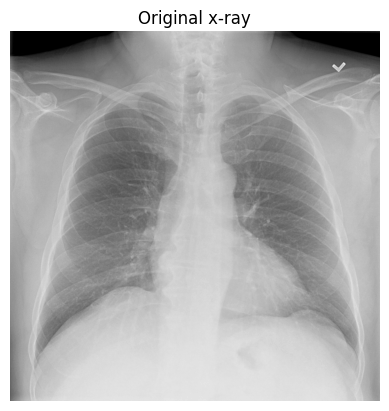

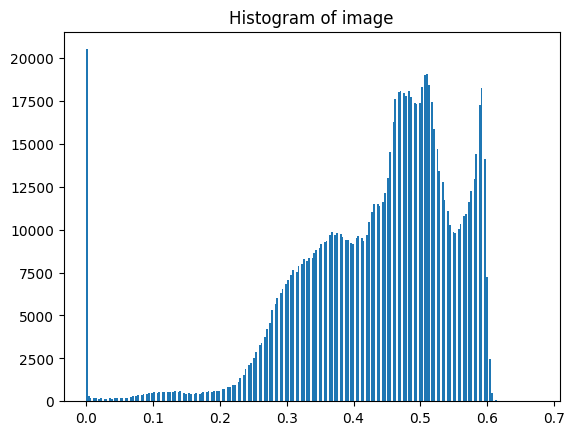

In [11]:
# 繪製histogram
# Import the required module
from skimage import exposure

# Show original x-ray image and its histogram
show_image(chest_xray_image, 'Original x-ray')

plt.title('Histogram of image')
plt.hist(chest_xray_image.ravel(), bins = 256)
plt.show()

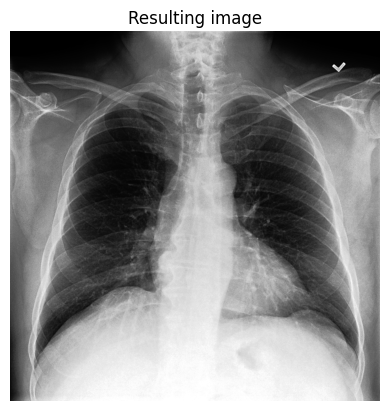

In [12]:
# Use histogram equalization to improve the contrast
xray_image_eq =  exposure.equalize_hist(chest_xray_image)

# Show the resulting image
show_image(xray_image_eq, 'Resulting image')

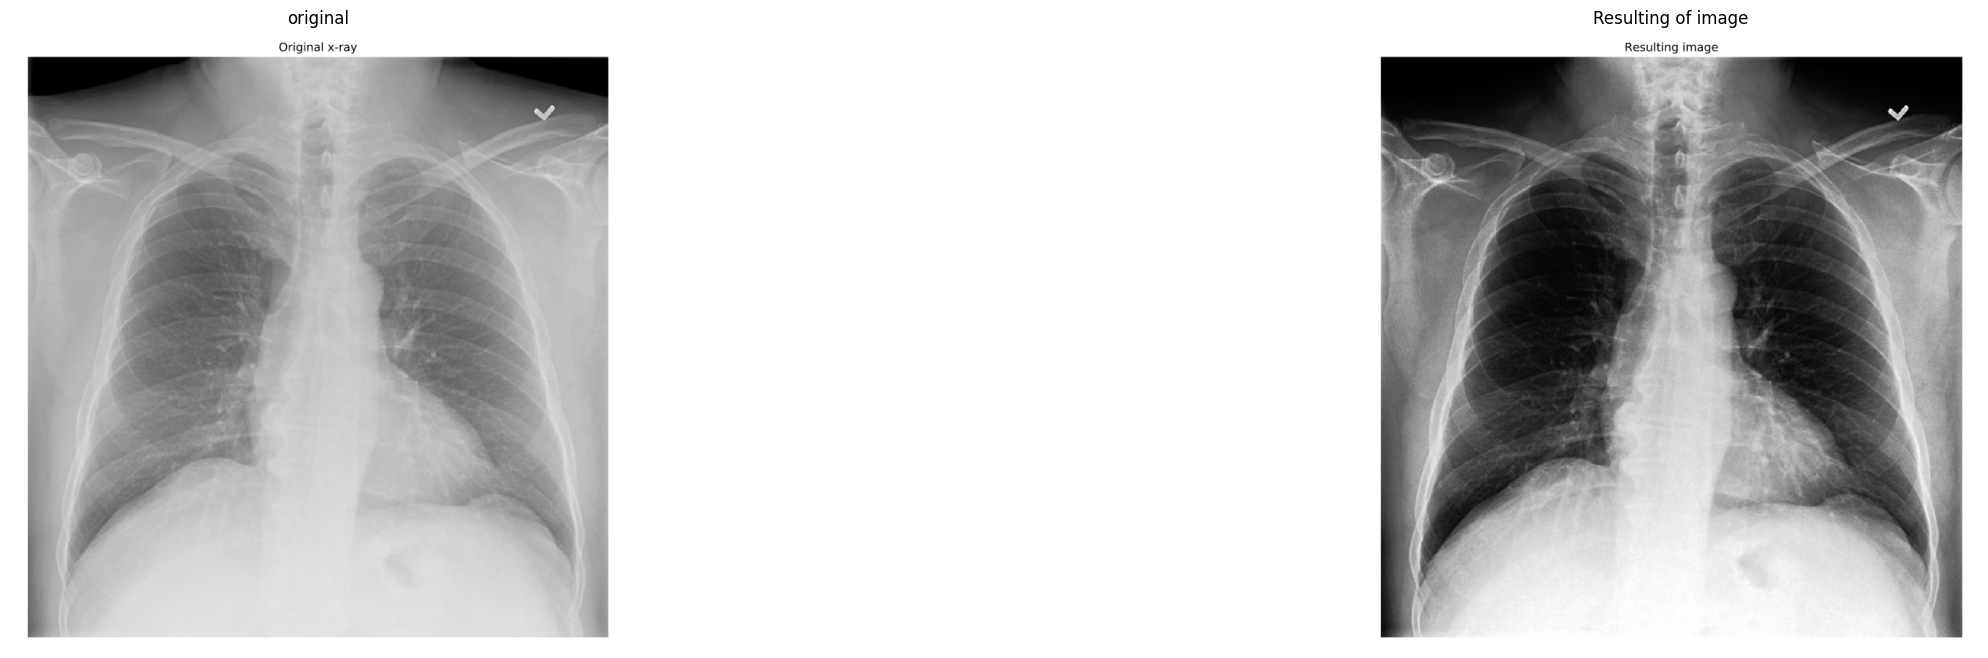

In [15]:
# 預期結果

original, hist = plt.imread('Original x-ray.png'), plt.imread('Resulting image.png')

plot_comparision(original, hist, 'Resulting of image')
plt.show()

clip_limit 0.01


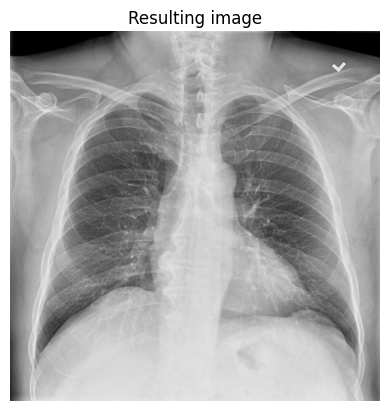

clip_limit 0.020000000000000004


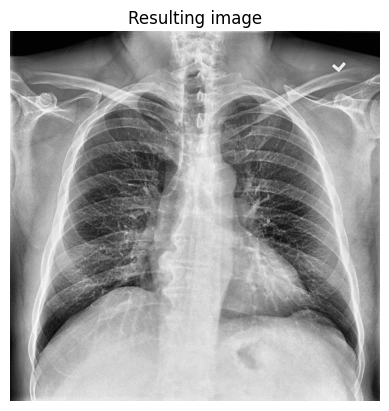

clip_limit 0.030000000000000006


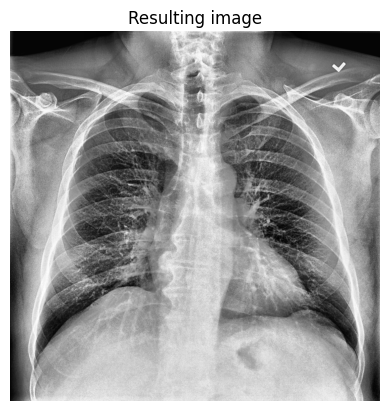

clip_limit 0.04000000000000001


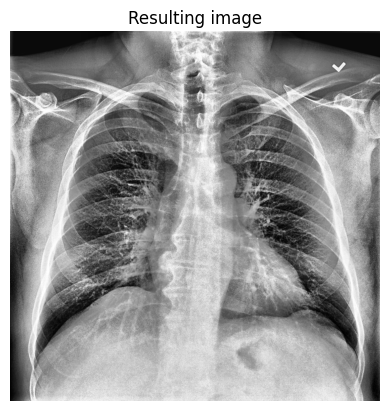

clip_limit 0.05000000000000001


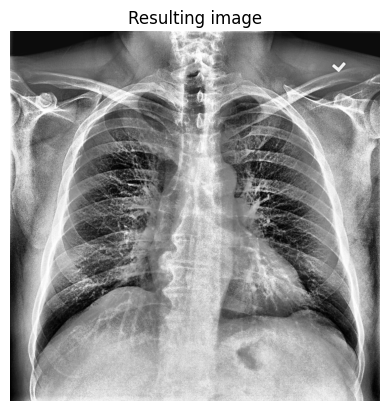

clip_limit 0.06000000000000001


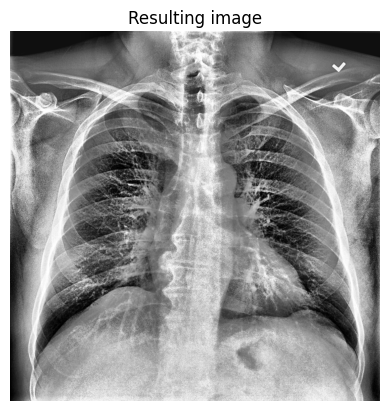

clip_limit 0.07


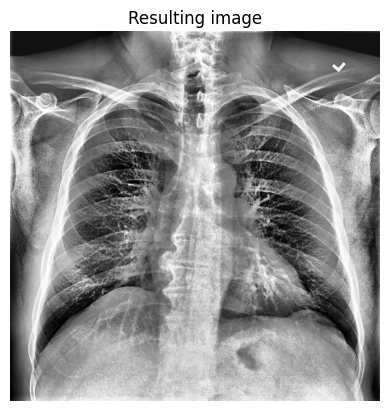

clip_limit 0.08


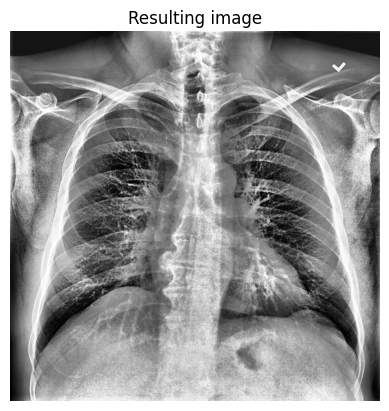

clip_limit 0.09000000000000001


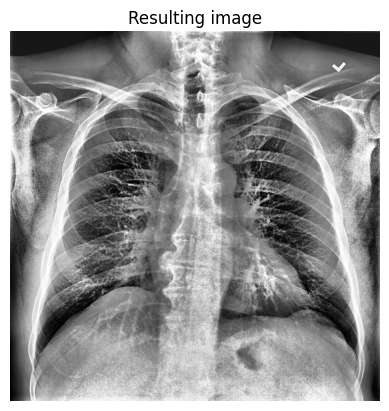

clip_limit 0.1


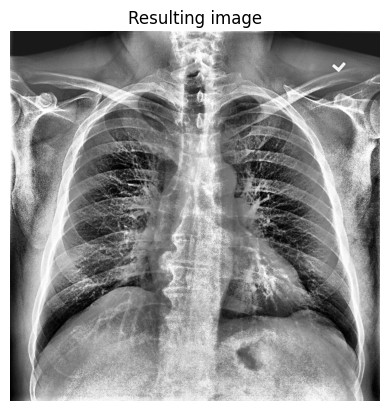

In [16]:
# Use histogram equalization to improve the contrast
for c in np.linspace(0.01, 0.1, 10):
    xray_image_eq =  exposure.equalize_adapthist(chest_xray_image, clip_limit = c)
    print('clip_limit', c)
    show_image(xray_image_eq, 'Resulting image')

In [17]:
# Practice
image_aerial = plt.imread('image_aerial.tiff')
image_aerial.shape

# 提示事項
# Import the required module from scikit-image.
# Use the histogram equalization function from the module previously imported.
# Show the resulting image.

(512, 512)

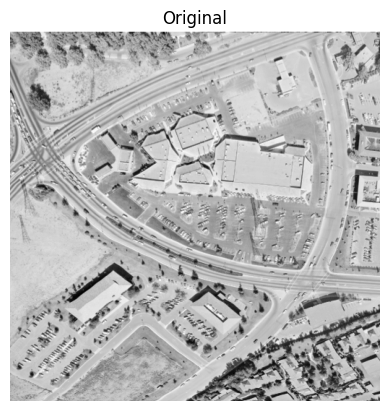

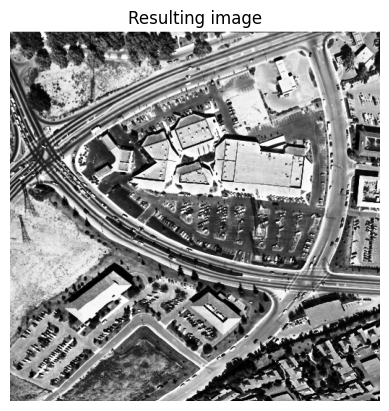

In [18]:
# Import the required module
from skimage import exposure

# Use histogram equalization to improve the contrast
image_eq =  exposure.equalize_hist(image_aerial)

# Show the original and resulting image
show_image(image_aerial, 'Original')
show_image(image_eq, 'Resulting image')

In [ ]:
# Practice

# Import the module that includes the Contrast Limited Adaptive Histogram Equalization (CLAHE) function.
# Obtain the image you'll work on, with a cup of coffee in it, from the module that holds all the images for testing purposes.
# From the previously imported module, call the function to apply the adaptive equalization method on the original image and set the clip limit to 0.03.

In [19]:
exposure.equalize_adapthist?

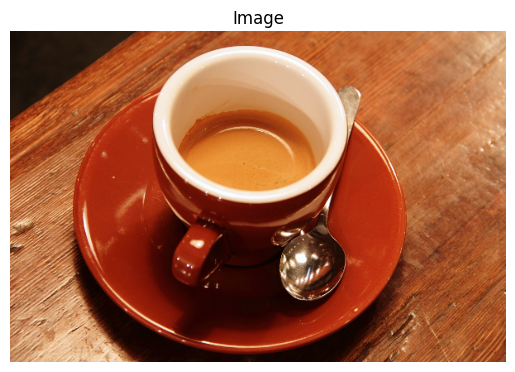

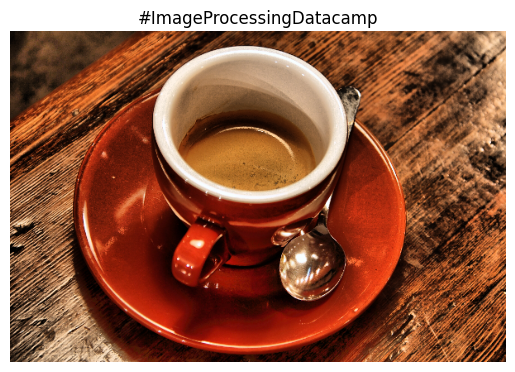

In [20]:
# Import the necessary modules
from skimage import data, data

# Load the image
original_image = data.coffee()

# Apply the adaptive equalization on the original image
adapthist_eq_image = exposure.equalize_adapthist(original_image, clip_limit = 0.03)

# Compare the original image to the equalized
show_image(original_image)
show_image(adapthist_eq_image, '#ImageProcessingDatacamp')

## Exposure_MNIST Dataset

In [1]:
# from keras.models import Sequential
from keras.datasets import mnist
# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

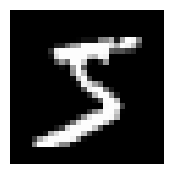

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize = (2, 2))
plt.imshow(X_train[0].reshape(28, 28), cmap = 'gray')
plt.axis('off')
plt.show()

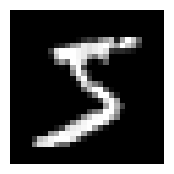

In [3]:
from skimage.filters import gaussian
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist

mnist_adapthist = exposure.equalize_adapthist(X_train[0], clip_limit = 0.02)
plt.figure(figsize = (2, 2))
plt.imshow(mnist_adapthist, cmap = 'gray')
plt.axis('off')
plt.show()

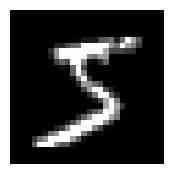

In [4]:
from skimage.filters import gaussian
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist

mnist_hist = exposure.equalize_hist(X_train[0].reshape(28, 28))
plt.figure(figsize = (2, 2))
plt.imshow(mnist_hist, cmap = 'gray')
plt.axis('off')
plt.show()

## Exposure-Adapthist_MNIST Dataset
* clip_limit = 0.01

In [21]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
from datetime import datetime

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 128, input_dim = 784, kernel_initializer = 'normal', activation = 'relu')) 
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
%%time
# 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist
X_train_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit = 0.01) for x in X_train[:]]) # <--核心
X_test_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit = 0.01) for x in X_test[:]])   # <--核心
print('Preprocessed by skimage.exposure')

Preprocessed by skimage.exposure
CPU times: total: 8min 40s
Wall time: 15min 9s


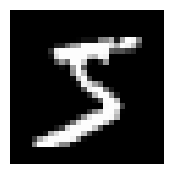

In [23]:
# 劃出原來圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train[0], cmap = 'gray')
plt.axis('off')
plt.show()

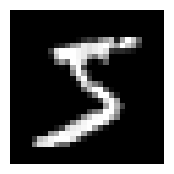

Data range after preprocessed 0.0 1.0


In [24]:
# 劃出一圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train_skimage[0], cmap = 'gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [25]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將training的input資料轉為二維
X_train = X_train_skimage # <--preprocessed by skimage
X_test  = X_test_skimage  # <--preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')

x_Train_norm = X_train_2D # /255.0  # <--取消
x_Test_norm = X_test_2D   # /255.0  # <--取消

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 10, 
                          batch_size = 800, verbose = 2)

Epoch 1/10
60/60 - 1s - loss: 1.0334 - accuracy: 0.7517 - val_loss: 0.4249 - val_accuracy: 0.8898 - 1s/epoch - 18ms/step
Epoch 2/10
60/60 - 1s - loss: 0.3797 - accuracy: 0.8953 - val_loss: 0.3142 - val_accuracy: 0.9137 - 694ms/epoch - 12ms/step
Epoch 3/10
60/60 - 0s - loss: 0.3063 - accuracy: 0.9137 - val_loss: 0.2706 - val_accuracy: 0.9233 - 308ms/epoch - 5ms/step
Epoch 4/10
60/60 - 0s - loss: 0.2685 - accuracy: 0.9247 - val_loss: 0.2461 - val_accuracy: 0.9285 - 493ms/epoch - 8ms/step
Epoch 5/10
60/60 - 0s - loss: 0.2394 - accuracy: 0.9328 - val_loss: 0.2223 - val_accuracy: 0.9384 - 430ms/epoch - 7ms/step
Epoch 6/10
60/60 - 0s - loss: 0.2143 - accuracy: 0.9401 - val_loss: 0.2044 - val_accuracy: 0.9435 - 315ms/epoch - 5ms/step
Epoch 7/10
60/60 - 1s - loss: 0.1936 - accuracy: 0.9458 - val_loss: 0.1904 - val_accuracy: 0.9454 - 542ms/epoch - 9ms/step
Epoch 8/10
60/60 - 0s - loss: 0.1766 - accuracy: 0.9500 - val_loss: 0.1768 - val_accuracy: 0.9509 - 322ms/epoch - 5ms/step
Epoch 9/10
60/60 

In [26]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.1486 - accuracy: 0.9574

	[Info] Accuracy of testing data = 95.7%


In [27]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1401 - accuracy: 0.9611

	[Info] Accuracy of training data = 96.1%


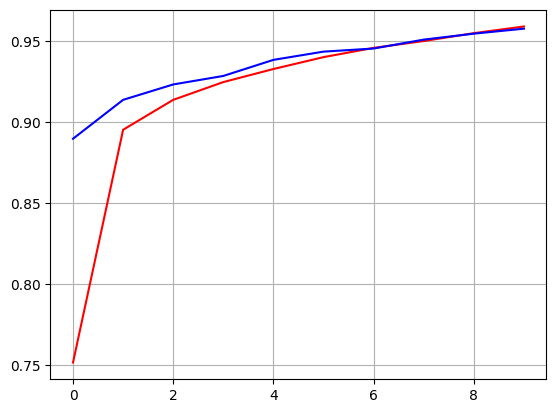

In [28]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

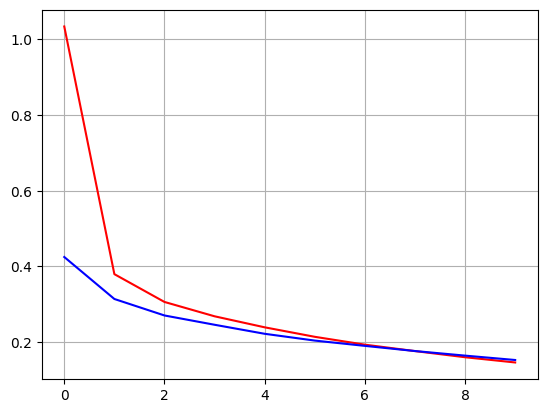

In [29]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()

* clip_limit = 0.02

In [30]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
from datetime import datetime

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 128, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [31]:
%%time
# 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist
X_train_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit = 0.02) for x in X_train[:]])
X_test_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit = 0.02) for x in X_test[:]])
print('Preprocessed by skimage.exposure')

Preprocessed by skimage.exposure
CPU times: total: 6min 11s
Wall time: 6min 15s


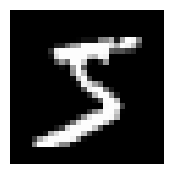

In [32]:
# 劃出原來圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train[0], cmap = 'gray')
plt.axis('off')
plt.show()

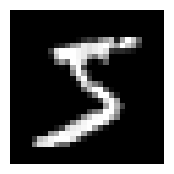

Data range after preprocessed 0.0 1.0


In [33]:
# 劃出一圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train_skimage[0], cmap = 'gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [34]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

# 將training的input資料轉為二維
X_train = X_train_skimage # <--preprocessed by skimage
X_test  = X_test_skimage  # <--preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')

x_Train_norm = X_train_2D # /255.0  # <--取消
x_Test_norm = X_test_2D   # /255.0  # <--取消

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 10, 
                          batch_size = 800, verbose = 2)

Epoch 1/10
60/60 - 1s - loss: 1.0576 - accuracy: 0.7592 - val_loss: 0.4328 - val_accuracy: 0.8874 - 984ms/epoch - 16ms/step
Epoch 2/10
60/60 - 1s - loss: 0.3819 - accuracy: 0.8951 - val_loss: 0.3112 - val_accuracy: 0.9131 - 642ms/epoch - 11ms/step
Epoch 3/10
60/60 - 1s - loss: 0.3029 - accuracy: 0.9146 - val_loss: 0.2655 - val_accuracy: 0.9268 - 594ms/epoch - 10ms/step
Epoch 4/10
60/60 - 1s - loss: 0.2604 - accuracy: 0.9278 - val_loss: 0.2364 - val_accuracy: 0.9360 - 603ms/epoch - 10ms/step
Epoch 5/10
60/60 - 1s - loss: 0.2283 - accuracy: 0.9366 - val_loss: 0.2144 - val_accuracy: 0.9407 - 589ms/epoch - 10ms/step
Epoch 6/10
60/60 - 1s - loss: 0.2039 - accuracy: 0.9432 - val_loss: 0.1965 - val_accuracy: 0.9463 - 536ms/epoch - 9ms/step
Epoch 7/10
60/60 - 0s - loss: 0.1829 - accuracy: 0.9490 - val_loss: 0.1786 - val_accuracy: 0.9523 - 467ms/epoch - 8ms/step
Epoch 8/10
60/60 - 0s - loss: 0.1661 - accuracy: 0.9531 - val_loss: 0.1685 - val_accuracy: 0.9537 - 497ms/epoch - 8ms/step
Epoch 9/10


In [35]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.1444 - accuracy: 0.9585

	[Info] Accuracy of testing data = 95.9%


* clip_limit = 0.08

In [36]:
# 導入函式庫
import numpy as np  
import keras
# from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
from datetime import datetime

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 128, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [37]:
%%time
# 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist
X_train_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit = 0.08) for x in X_train[:]])
X_test_skimage = np.array([exposure.equalize_adapthist(image = x, clip_limit = 0.08) for x in X_test[:]])
print('Preprocessed by skimage.exposure')

Preprocessed by skimage.exposure
CPU times: total: 6min 11s
Wall time: 6min 16s


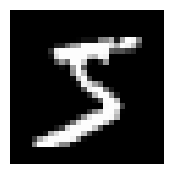

In [38]:
# 劃出原來圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train[0], cmap = 'gray')
plt.axis('off')
plt.show()

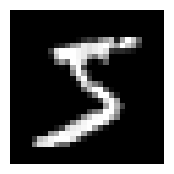

Data range after preprocessed 0.0 1.0


In [39]:
# 劃出一圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train_skimage[0], cmap = 'gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [40]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train)
y_TestOneHot = np_utils.to_categorical(y_test)

# 將training的input資料轉為二維
X_train = X_train_skimage # <--preprocessed by skimage
X_test  = X_test_skimage  # <--preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')

x_Train_norm = X_train_2D # /255.0  # <--取消
x_Test_norm = X_test_2D   # /255.0  # <--取消

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 10, 
                          batch_size = 800, verbose = 2)

Epoch 1/10
60/60 - 1s - loss: 1.0519 - accuracy: 0.7634 - val_loss: 0.4293 - val_accuracy: 0.8884 - 920ms/epoch - 15ms/step
Epoch 2/10
60/60 - 1s - loss: 0.3811 - accuracy: 0.8955 - val_loss: 0.3145 - val_accuracy: 0.9135 - 614ms/epoch - 10ms/step
Epoch 3/10
60/60 - 1s - loss: 0.3057 - accuracy: 0.9152 - val_loss: 0.2715 - val_accuracy: 0.9222 - 635ms/epoch - 11ms/step
Epoch 4/10
60/60 - 1s - loss: 0.2663 - accuracy: 0.9258 - val_loss: 0.2416 - val_accuracy: 0.9319 - 743ms/epoch - 12ms/step
Epoch 5/10
60/60 - 1s - loss: 0.2353 - accuracy: 0.9336 - val_loss: 0.2204 - val_accuracy: 0.9393 - 657ms/epoch - 11ms/step
Epoch 6/10
60/60 - 1s - loss: 0.2106 - accuracy: 0.9410 - val_loss: 0.2046 - val_accuracy: 0.9417 - 664ms/epoch - 11ms/step
Epoch 7/10
60/60 - 1s - loss: 0.1904 - accuracy: 0.9468 - val_loss: 0.1850 - val_accuracy: 0.9477 - 662ms/epoch - 11ms/step
Epoch 8/10
60/60 - 1s - loss: 0.1742 - accuracy: 0.9507 - val_loss: 0.1730 - val_accuracy: 0.9515 - 640ms/epoch - 11ms/step
Epoch 9/

In [44]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9556

	[Info] Accuracy of testing data = 95.6%


## Exposure-Equalize_Hist

In [45]:
# 導入函式庫
import numpy as np
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils
from matplotlib import pyplot as plt
import os
from datetime import datetime

start = datetime.now()

# 載入MNIST資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 建立簡單的線性執行模型
model = keras.models.Sequential()
# Add Input layer, 隱藏層(hidden layer)有256個輸出變數
model.add(Dense(units = 128, input_dim = 784, kernel_initializer = 'normal', activation = 'relu'))
# Add output layer
model.add(Dense(units = 10, kernel_initializer = 'normal', activation = 'softmax'))

# 選擇損失函數、優化方法及成效衡量方式
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [46]:
%%time
# 僅是部分資料
from tqdm import tqdm # 跑出步近圖
import numpy as np
from skimage.filters import gaussian
from skimage.filters import sobel
from skimage import exposure
# exposure.equalize_adapthist
# exposure.equalize_hist
X_train_skimage = np.array([exposure.equalize_hist(image = x) for x in X_train[:]])
X_test_skimage = np.array([exposure.equalize_hist(image = x) for x in X_test[:]])
print('Preprocessed by skimage.exposure')

Preprocessed by skimage.exposure
CPU times: total: 4.61 s
Wall time: 4.66 s


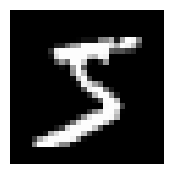

In [47]:
# 劃出原來圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train[0], cmap = 'gray')
plt.axis('off')
plt.show()

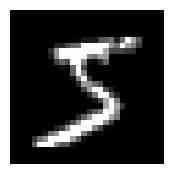

Data range after preprocessed 0.7882653061224489 1.0


In [48]:
# 劃出一圖片
plt.figure(figsize = (2, 2))
plt.imshow(X_train_skimage[0], cmap = 'gray')
plt.axis('off')
plt.show()
print('Data range after preprocessed', X_train_skimage[0].min(), X_train_skimage[0].max())

In [49]:
# 將training的label進行one-hot encoding
y_TrainOneHot = np_utils.to_categorical(y_train) 
y_TestOneHot = np_utils.to_categorical(y_test) 

# 將training的input資料轉為二維
X_train = X_train_skimage # <--preprocessed by skimage
X_test  = X_test_skimage  # <--preprocessed by skimage

X_train_2D = X_train.reshape(60000, 28 * 28).astype('float32')
X_test_2D = X_test.reshape(10000, 28 * 28).astype('float32')

x_Train_norm = X_train_2D # /255.0  # <--取消
x_Test_norm = X_test_2D   # /255.0  # <--取消

# 進行訓練，訓練過程會存在train_history變數中
train_history = model.fit(x = x_Train_norm, y = y_TrainOneHot, 
                          validation_split = 0.2, epochs = 10, 
                          batch_size = 800, verbose = 2)

Epoch 1/10
60/60 - 1s - loss: 2.2691 - accuracy: 0.1644 - val_loss: 2.2136 - val_accuracy: 0.1936 - 867ms/epoch - 14ms/step
Epoch 2/10
60/60 - 1s - loss: 2.1354 - accuracy: 0.3275 - val_loss: 2.0339 - val_accuracy: 0.5444 - 658ms/epoch - 11ms/step
Epoch 3/10
60/60 - 1s - loss: 1.9237 - accuracy: 0.4463 - val_loss: 1.7918 - val_accuracy: 0.5674 - 639ms/epoch - 11ms/step
Epoch 4/10
60/60 - 1s - loss: 1.6827 - accuracy: 0.5854 - val_loss: 1.5478 - val_accuracy: 0.5994 - 647ms/epoch - 11ms/step
Epoch 5/10
60/60 - 1s - loss: 1.4602 - accuracy: 0.6469 - val_loss: 1.3344 - val_accuracy: 0.7113 - 655ms/epoch - 11ms/step
Epoch 6/10
60/60 - 1s - loss: 1.2861 - accuracy: 0.6822 - val_loss: 1.1846 - val_accuracy: 0.6888 - 647ms/epoch - 11ms/step
Epoch 7/10
60/60 - 1s - loss: 1.1476 - accuracy: 0.7179 - val_loss: 1.0680 - val_accuracy: 0.7845 - 570ms/epoch - 10ms/step
Epoch 8/10
60/60 - 1s - loss: 1.0507 - accuracy: 0.7366 - val_loss: 0.9831 - val_accuracy: 0.7793 - 612ms/epoch - 10ms/step
Epoch 9/

In [50]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Test_norm, y_TestOneHot)
print()
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1] * 100.0))

313/313 [==============================] - 1s 3ms/step - loss: 0.8599 - accuracy: 0.7815

	[Info] Accuracy of testing data = 78.1%


In [51]:
# 顯示訓練成果(分數)
scores = model.evaluate(x_Train_norm, y_TrainOneHot)
print()
print("\t[Info] Accuracy of training data = {:2.1f}%".format(scores[1] * 100.0))

1875/1875 [==============================] - 5s 3ms/step - loss: 0.8788 - accuracy: 0.7720

	[Info] Accuracy of training data = 77.2%


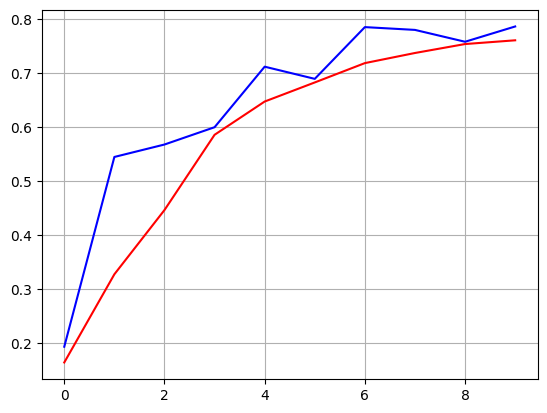

In [52]:
%matplotlib inline
# accuracy chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['accuracy'], color = 'red')
plt.plot(train_history.history['val_accuracy'], color = 'blue')
plt.grid()
plt.show()

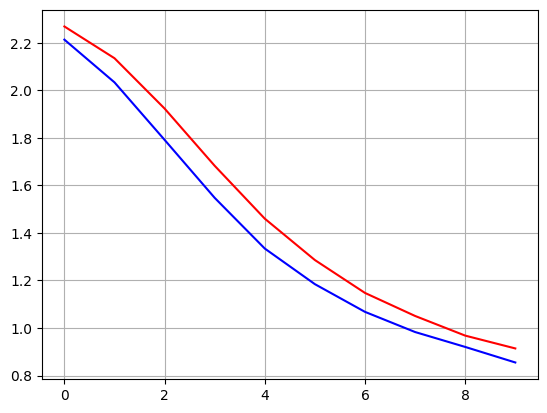

In [53]:
%matplotlib inline
# loss chart
import matplotlib.pyplot as plt
plt.plot(train_history.history['loss'], color = 'red')
plt.plot(train_history.history['val_loss'], color = 'blue')
plt.grid()
plt.show()